# Convolution: Nuts & Bolts - II

Convnets use the convolution operation for detecting local features across different layers. For example, in the first layer it uses the filters to detect local features such as edges of an image. In this notebook, we discuss how convolutional filters detect edges of an input image.


## Goals

- Handcraft edge detector filters
- Edge detection in a single-channel image using a single filter
- Define a convolution function for multi-channel image using and multiple filters
- Edge detection in a multi-channel image using multiple filters
- Edge detection using TensorFlow's convolution function




## Convolution for Edge Detection

Below we handcraft two filters to detect vertical and horizontal edges from:
- Grayscale image
- RGB image

      -- Note that in convnets we don't hardcode the filters. Instead a convnet determines what features to detect and learn suitable filters for those.


## Handcraft Filters for Edge Detection

In order to detect edges we need to detect the discontinuities in an image. I.e., we need to detect significant local changes in an image. We can use derivative to detect discontinuities. The edges corresponds to the extrema of the derivatives. Since images are discrete in nature, we can easily take the derivate of an image using a 2D derivative mask (filter).

One of the most commonly used edge detectors is the **Sobel filter**. It places an emphasis on pixels that are closer to the center of the mask.

- Sobel Vertical Filter:

| -1   | 0   | 1   |  
| :---:|:---:|:---:|
| -2   | 0   | 2   | 
| -1   | 0   | 1   |

- Sobel Horizontal Filter:

| 1    | 2    | 1   |  
| :---:|:---: |:---:|
| 0    | 0    | 0   | 
| -1   | -2   | 1   |



Another edge detector filter that we will use is the **Prewitt filter**. Unlike the Sobel filter, it does not place emphasis on pixels that are closer to the center of the masks.

- Prewitt Vertical Filter:

| -1   | 0   | 1   |  
| :---:|:---:|:---:|
| -1   | 0   | 1   | 
| -1   | 0   | 1   |

- Prewitt Horizontal Filter:

| 1    | 1    | 1   |  
| :---:|:---: |:---:|
| 0    | 0    | 0   | 
| -1   | -1   | 1   |


We will use two Sobel filters for detecting vertical and horizontal edges, respectively. Later, we will also use two Prewitt filters for the same purpose.

In addition to this, we will use two simple filters for edge detection.

- Simple Vertical Filter:

| 0   | 1   | 0   |  
| :---:|:---:|:---:|
| 0   | 1   | 0   | 
| 0   | 1   |  0  |

- Simple Horizontal Filter:

|   0  | 0    | 0   |  
| :---:|:---: |:---:|
| 1    | 1    | 1   | 
| 0   | 0   | 0   |



## Edge detection in a single-channel image using a single filter

We use previously defined "conv_2D_SingleChannelInput_SingleFilter" function for detecting edges on a single-channel image (i.e., grayscale image) using a single filter. We use the handcrafted edge detector filters.


## Detect Edges on a Grayscale image using Sobel Filters

In [1]:
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt

from pylab import imread, gray, imshow

import tensorflow as tf
from tensorflow import keras

2022-12-31 12:26:33.511452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def conv_2D_SingleChannelInput_SingleFilter(X, K, s): 
    # Get the height and width of the filter
    f_h, f_w = K.shape
    
    # Get the height and width of the input
    n_h, n_w = X.shape
    
    # Create the output (feature map) matrix
    Z = np.zeros(((n_h - f_h)//s + 1, (n_w - f_w)//s + 1))
    
    # Perform cross-correlation
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            element_wise_product = X[i*s: i*s + f_h, j*s: j*s + f_w] * K
            Z[i, j] = np.sum(element_wise_product)          
    return Z

Dimension of the image:  (280, 190)


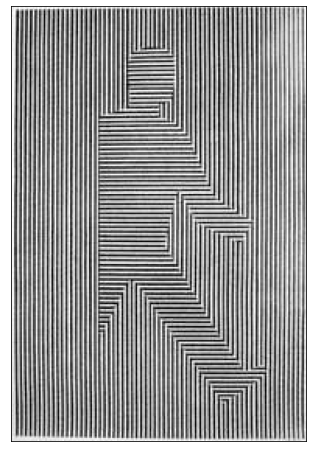

Vertical Sobel filter:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Horizontal Sobel filter:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

Feature Maps:


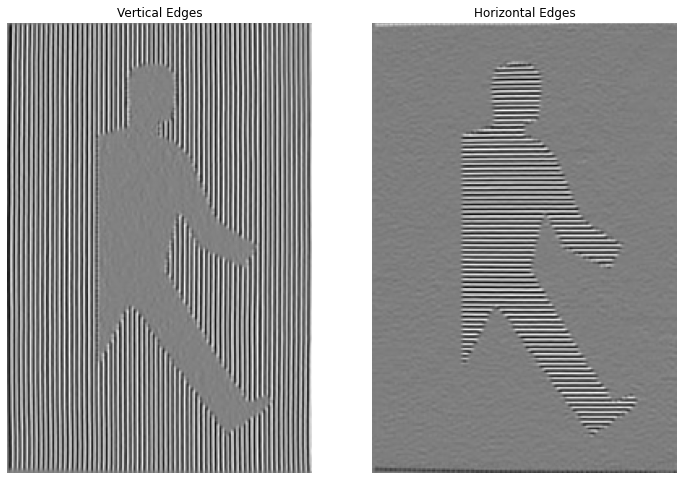

In [4]:
# Read the image as grayscale 
X = imread("/Users/hasan/datasets/pics/Stripe.JPG")[:,:,0]

print("Dimension of the image: ", X.shape)

# Display the image
plt.figure(figsize=(10,8))
plt.imshow(X, cmap="gray")
plt.xticks(())
plt.yticks(())
plt.show()


# Create a Sobel filter to detect vertical edges
sobel_vertical = np.array([[-1, 0, 1], 
                           [-2, 0, 2], 
                           [-1, 0, 1]])
print("Vertical Sobel filter:\n", sobel_vertical)



# Create a Sobel filter to detect horizontal edges
sobel_horizontal = np.array([[1, 2, 1], 
                             [0, 0, 0], 
                             [-1, -2, -1]])
print("\nHorizontal Sobel filter:\n", sobel_horizontal)


# Detect vertical edges via convolution
Z_vertical_edges = conv_2D_SingleChannelInput_SingleFilter(X, sobel_vertical, 1)

# Detect horizontal edges via convolution
Z_horizontal_edges = conv_2D_SingleChannelInput_SingleFilter(X, sobel_horizontal, 1)


# Plot the features maps
print("\nFeature Maps:")
plt.figure(figsize=(12,18))

plt.subplot(121)
plt.imshow(Z_vertical_edges, cmap="gray") 
plt.axis("off") 
plt.title("Vertical Edges")

plt.subplot(122)
plt.imshow(Z_horizontal_edges, cmap="gray") 
plt.axis("off") 
plt.title("Horizontal Edges")
plt.show()

## Detect Edges on a Grayscale image using Prewitt Filters

Now we detect vertical & horizontal edges on a grayscale image using Prewitt filters. Then, we compare the feature maps obtained from Sobel filters.

Vertical Prewitt filter:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

Horizontal Prewitt filter:
 [[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]

Feature Maps:


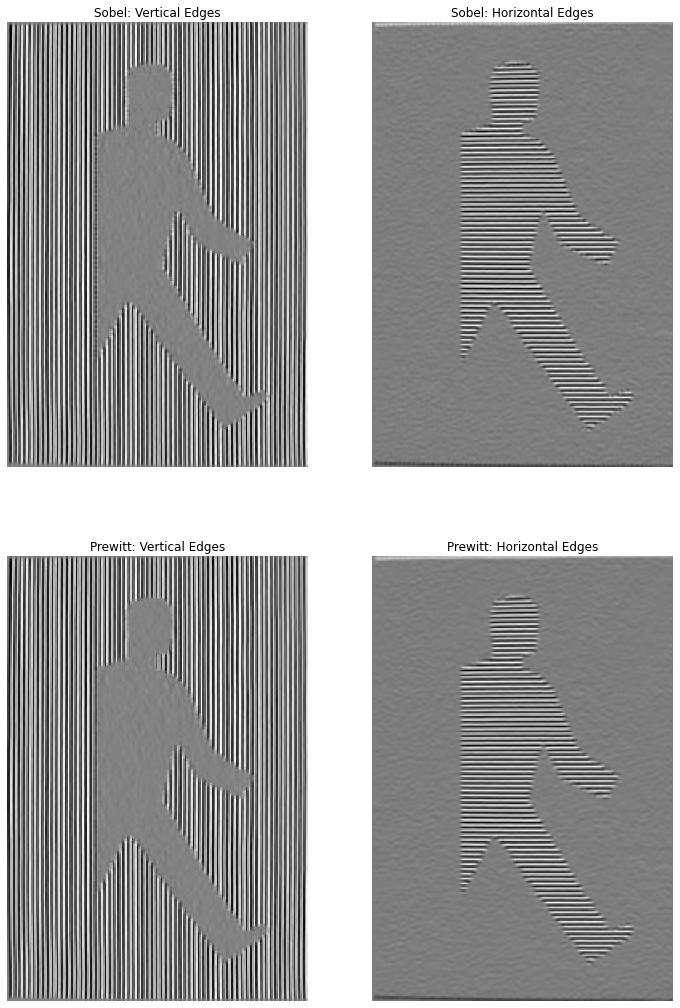

In [5]:
# Create a Prewitt filter to detect vertical edges
prewitt_vertical = np.array([[-1, 0, 1], 
                             [-1, 0, 1], 
                             [-1, 0, 1]])
print("Vertical Prewitt filter:\n", prewitt_vertical)


# Create a Prewitt filter to detect horizontal edges
prewitt_horizontal = np.array([[1, 1, 1], 
                               [0, 0, 0], 
                               [-1, -1, -1]])
print("\nHorizontal Prewitt filter:\n", prewitt_horizontal)


# Detect vertical edges via convolution
Z_vertical_edges_prewitt = conv_2D_SingleChannelInput_SingleFilter(X, prewitt_vertical, 1)

# Detect horizontal edges via convolution
Z_horizontal_edges_prewitt = conv_2D_SingleChannelInput_SingleFilter(X, prewitt_horizontal, 1)


# Plot the features maps
print("\nFeature Maps:")
plt.figure(figsize=(12,18))

plt.subplot(221)
plt.imshow(Z_vertical_edges, cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Sobel: Vertical Edges")

plt.subplot(222)
plt.imshow(Z_horizontal_edges, cmap="gray") 
plt.axis("off") 
plt.title("Sobel: Horizontal Edges")

plt.subplot(223)
plt.imshow(Z_vertical_edges_prewitt, cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Prewitt: Vertical Edges")

plt.subplot(224)
plt.imshow(Z_horizontal_edges_prewitt, cmap="gray") 
plt.axis("off") 
plt.title("Prewitt: Horizontal Edges")

plt.show()

## Convolution: Multi-Channel Input &  Multi-Channel Filters

So far, we have described the convolution operation on a single-channel input and by using a single filter. After convolution, it produces a single-channel feature map. 

Now we perform convolution on a multi-channel input ($n_k$ channels) using a single filter with multiple channels ($n_k$ channels). We will convolve an input $X$ with $n_k$ input channels using a filter with $n_k$ output channels to produce a single feature map, as shown below.

<img src="http://engineering.unl.edu/images/uploads/CNN_Conv_MultiInput_SingleOutput.png" width=700, height=400>

This process can be generalized by convolving a multi-channel input ($n_k$ channels) using multiple ($f_k$) filters each with multiple channels ($n_k$ channels). Each filter has $n_k$ output channels to convolve with the $n_k$ input channels, which produces a single feature map. Thus, $f_k$ multi-channel filters will produce $f_k$ feature maps. This process is illustrated below.

<img src="http://engineering.unl.edu/images/uploads/CNN_Conv_MultiInput_MultiOutput.png" width=700, height=400>


We define a function to perform convolution on a multi-channel input using multiple multi-channel filters. Thus, the filter tensor will be 4D: height x width x number of input channels x number of output channels (filters)

We make a slight change in the notation. The filter weight matrix will be denoted by $W$ from now on to conform with the convnet literature.


The function takes the following input:
- X: Image or feature map of dimension: height $n_h$ x width $n_w$ x num_of_input_channels $n_k$
- W: kernel (filter) tensor of dimension: height $f_h$ x width $f_w$ x num_of_input_channels $n_k$ x number of filters (output channels) $f_k$ x
- s: the stride length 

It creates a tensor representing feature maps: height x width x number of channels
- height = $n_h - f_h/s + 1$
- width = $n_w - f_w/s + 1$
- number of channels  = number of filters ($f_k$)


In [6]:
def conv_2D_MultiChannelInput_MultipleChannelFilters(X, W, s):
    
    # If X doesn't have channel information (in case of single-channel), 
    #   then add an axis for the channel at the end
    if(X.ndim == 2): 
        X = expand_dims(X, axis=-1)
    
    # Get the height and width of input as well as the number of channels 
    n_h, n_w, n_k = X.shape
    
    # Get the number of filters, height and width 
    f_k = 0 # number of filters
    f_h = 0 # height of each filter
    f_w = 0 # width of each filter
    
    if(W.ndim == 2): # Handles the case if a single multi-channel filter is used 
        f_h, f_w, n_k = W.shape
        f_k = 1
    else:
        f_h, f_w, n_k, f_k = W.shape

    # Create the output (feature map) tensor of dimension: height x width x number of channels
    Z = np.zeros(((n_h - f_h)//s + 1, (n_w - f_w)//s + 1, f_k))    

    # Perform convolution
    for i in range(Z.shape[0]): # Get the x-coordinate of the output
        for j in range(Z.shape[1]): # Get the y-coordinate of the output
            # for each filter convolve each input channel with 
            #   the corresponding filter channel to produce a single feature map
            for k_out in range(f_k): 
                for k_in in range(n_k): # For each input channel
                    img_segment = X[i*s: i*s + f_h, j*s: j*s + f_w, k_in] # Get the input region for convolution
                    conv_value = img_segment * W[:, :, k_in, k_out] # Perform convolution for each input channel
                    Z[i, j, k_out] += np.sum(conv_value)

    return Z

## Convolution: Multi-Channel Input &  Multi-Channel Filters: Example

Shape of Input Image Tensor:  (280, 190, 3)


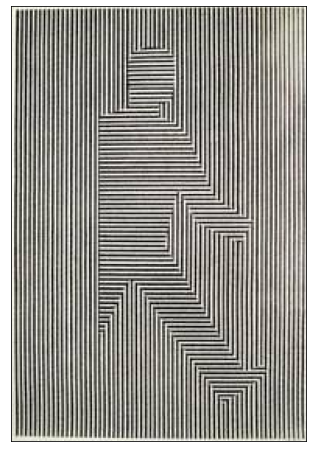


Shape of the filter Tensor (height, width, input channels, output channels):  (3, 3, 3, 2)

Vertical Sobel filters (for all channels):
 [[[-1. -1. -1.]
  [ 0.  0.  0.]
  [ 1.  1.  1.]]

 [[-2. -2. -2.]
  [ 0.  0.  0.]
  [ 2.  2.  2.]]

 [[-1. -1. -1.]
  [ 0.  0.  0.]
  [ 1.  1.  1.]]]

Horizontal Sobel filters (for all channels):
 [[[ 1.  1.  1.]
  [ 2.  2.  2.]
  [ 1.  1.  1.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[-1. -1. -1.]
  [-2. -2. -2.]
  [-1. -1. -1.]]]

Shape of the feature map (number of feature maps, height, width):  (278, 188, 2)

Feature Maps:


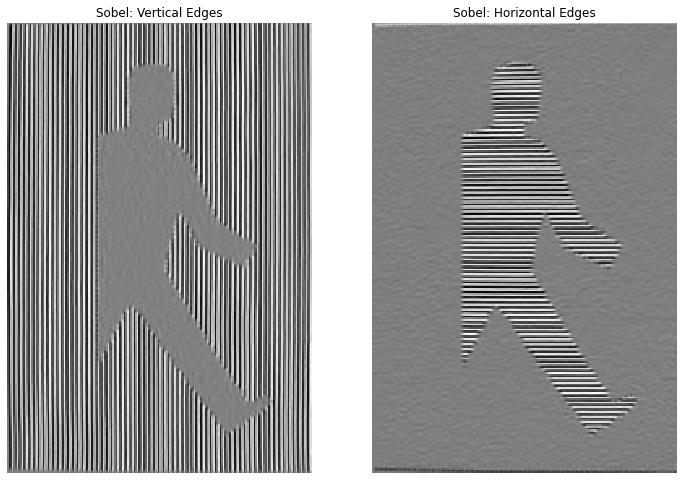

In [7]:
# Read the RGB image 
X = imread("/Users/hasan/datasets/pics/Stripe.JPG")
#X = imread("/Users/hasan/datasets/pics/Bench.JPG") 

print("Shape of Input Image Tensor: ", X.shape)

# Display the image
plt.figure(figsize=(10,8))
plt.imshow(X, cmap="gray")
plt.xticks(())
plt.yticks(())
plt.show()


'''
The input image has n_k channels.
Thus, a single filter must have n_k output channels.
The size of a single filter is: height x width x n_k
We create two filters in this example, thus f_k = 2
All filters have: height x width = 3 x 3
The filter tensor is 4D: height x width x n_k x f_k  = 3 x 3 x 3 x 2
- the first filter (with 3 channels) is Sobel vertical filter
- the second filter (with 3 channels) is Sobel horizontal filter
'''

channels_input = 3
channels_output = 2

filters = np.zeros(shape=(3, 3, channels_input, channels_output), dtype=np.float32)

print("\nShape of the filter Tensor (height, width, input channels, output channels): ", filters.shape)

# Create a Sobel filter to detect vertical edges
filters[0, 0, :, 0] = -1
filters[0, 1, :, 0] = 0
filters[0, 2, :, 0] = 1

filters[1, 0, :, 0] = -2
filters[1, 1, :, 0] = 0
filters[1, 2, :, 0] = 2

filters[2, 0, :, 0] = -1
filters[2, 1, :, 0] = 0
filters[2, 2, :, 0] = 1
print("\nVertical Sobel filters (for all channels):\n", filters[:, :, :, 0])

# Create a Sobel filter to detect horizontal edges
filters[0, 0, :, 1] = 1
filters[0, 1, :, 1] = 2
filters[0, 2, :, 1] = 1

filters[2, 0, :, 1] = -1
filters[2, 1, :, 1] = -2
filters[2, 2, :, 1] = -1
print("\nHorizontal Sobel filters (for all channels):\n", filters[:, :, :, 1])


# Perform convolution
Z = conv_2D_MultiChannelInput_MultipleChannelFilters(X, filters, 1)
print("\nShape of the feature map (number of feature maps, height, width): ", Z.shape)

# Plot the features maps
print("\nFeature Maps:")
plt.figure(figsize=(12,18))

plt.subplot(121)
plt.imshow(Z[:, :, 0], cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Sobel: Vertical Edges")

plt.subplot(122)
plt.imshow(Z[:, :, 1], cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Sobel: Horizontal Edges")

plt.show()

# Convolution: TensorFlow Implementation

Below we illustrate how to use **TensorFlow** library's convolution function to detect edges. We use the handcrafted filters. The edge detection is demonstrated on two types of images.
- Grayscale: Single-Channel
- RGB: Multi-Channel


## Detect Edges from a Grayscale image using Tensorflow

We perform convolution on a grayscale image to detect vertical and horizontal edges using **TensorFlow's tf.nn.conv2d()** function. The first two arguments are images and filters.
- images: the input mini-batch (a 4D tensor of shape [mini-batch size, height, width, channels])
- filters: set of filters, which is a 4-D tensor of shape [filter_height, filter_width, in_channels, out_channels]. **The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [out_channels])**


The last two arguments are strides and padding. We will discuss about padding later. In the example below, padding is set to "VALID", i.e., no extra zeros are added to the input matrix.


To use TensorFlow's tf.nn.conv2d(), we need to perform the following pre-processing.

- Load the image as grayscale image.
- The pixel intensity for each channel is represented as a byte from 0 to 255. Thus, we scale the input features (pixels) by dividing by 255.
- Add an extra dimension for the single channel (using NumPy's expand_dims). 

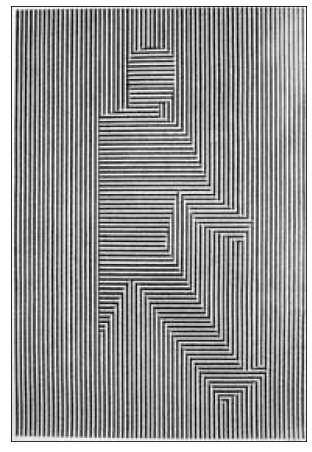

Shape of the images array:  (1, 280, 190)
Shape of the images array (with channel):  (1, 280, 190, 1)
No. of Channels:  1

Vertical Sobel filter:
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]

Horizontal Sobel filter:
 [[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]

Feature Maps:


2022-12-31 12:30:10.828749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


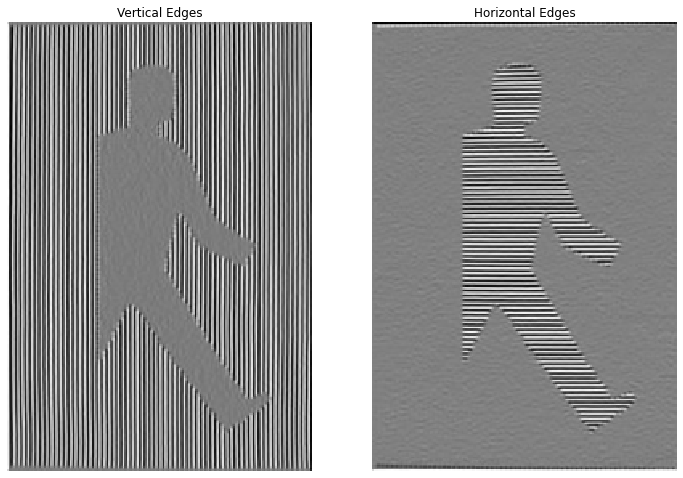

In [8]:
# Read the image & scale it
X = imread("/Users/hasan/datasets/pics/Stripe.JPG")[:,:,0] / 255
#X = imread("/Users/hasan/datasets/pics/Bench.JPG")[:,:,0] / 255

# Display the image
plt.figure(figsize=(10,8))
plt.imshow(X, cmap = "gray")
plt.xticks(())
plt.yticks(())
plt.show()


'''
The tf.nn.conv2d() function requires the input to be a 4D tensor: 
    batch_size x height x width x number_of_channels
    
We need to add a new dimension at the beginning (size of mini-batch), and 
at the end (number of channels).

We create a mini-batch by putting X in an array.
'''
images = np.array([X])
print("Shape of the images array: ", images.shape)

# Add an axis for the channel
images = expand_dims(images, axis=-1)
print("Shape of the images array (with channel): ", images.shape)

batch_size, height, width, channels = images.shape
print("No. of Channels: ", channels)


# Create 2 filters (with zero values) of dimension 3 x 3
filters = np.zeros(shape=(3, 3, channels, 2), dtype=np.float32)

# Initialize the filters using Sobel filters

# Create a Sobel filter to detect vertical edges
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filters[:, :, 0, 0] = sobel_vertical 
print("\nVertical Sobel filter:\n", filters[:, :, 0, 0])

# Create a Sobel filter to detect horizontal edges
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
filters[:, :, 0, 1] = sobel_horizontal 
print("\nHorizontal Sobel filter:\n", filters[:, :, 0, 1])


# Perform 2D convolution
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

# Display the features maps
print("\nFeature Maps:")
plt.figure(figsize=(12,18))

plt.subplot(121)
plt.imshow(outputs[0, :, :, 0], cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Vertical Edges")

plt.subplot(122)
plt.imshow(outputs[0, :, :, 1], cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Horizontal Edges")
plt.show()

## Detect Edges from a RGB image using Tensorflow

The RGB image has 3 color channels. Thus, we add 3 filters for each channel to produce a single output map.

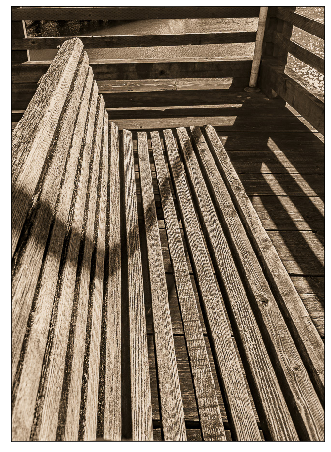

Shape of the images array:  (1, 900, 648, 3)
No. of Channels:  3

Vertical Sobel filters (for all channels):
 [[[-1. -1. -1.]
  [ 0.  0.  0.]
  [ 1.  1.  1.]]

 [[-2. -2. -2.]
  [ 0.  0.  0.]
  [ 2.  2.  2.]]

 [[-1. -1. -1.]
  [ 0.  0.  0.]
  [ 1.  1.  1.]]]

Horizontal Sobel filters (for all channels):
 [[[ 1.  1.  1.]
  [ 2.  2.  2.]
  [ 1.  1.  1.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[-1. -1. -1.]
  [-2. -2. -2.]
  [-1. -1. -1.]]]

Outputs shape:  (1, 900, 648, 2)

Feature Maps


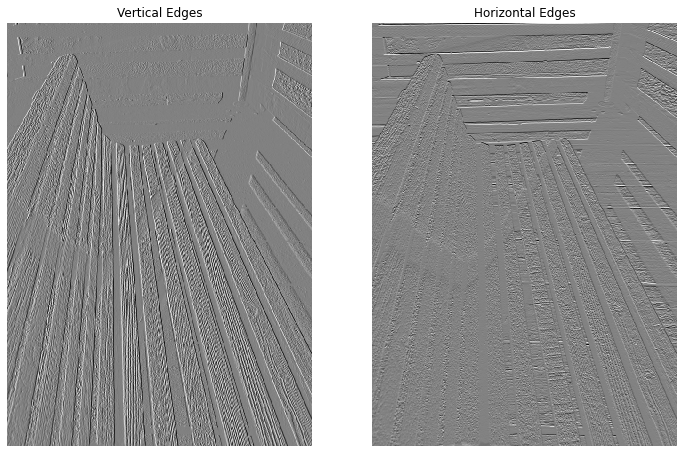

In [9]:
# Read the RGB image & scale it
X = imread("/Users/hasan/datasets/pics/Bench.JPG") / 255 

# Display the image
plt.figure(figsize=(10,8))
plt.imshow(X, interpolation="nearest")
plt.xticks(())
plt.yticks(())
plt.show()

# Create an array of images
images = np.array([X])
print("Shape of the images array: ", images.shape)

batch_size, height, width, channels = images.shape
print("No. of Channels: ", channels)


# Create 2 filters (with zero values) of dimension 3 x 3
filters = np.zeros(shape=(3, 3, channels, 2), dtype=np.float32)

# Create a Sobel filter to detect vertical edges
filters[0, 0, :, 0] = -1
filters[0, 1, :, 0] = 0
filters[0, 2, :, 0] = 1

filters[1, 0, :, 0] = -2
filters[1, 1, :, 0] = 0
filters[1, 2, :, 0] = 2

filters[2, 0, :, 0] = -1
filters[2, 1, :, 0] = 0
filters[2, 2, :, 0] = 1
print("\nVertical Sobel filters (for all channels):\n", filters[:, :, :, 0])

# Create a Sobel filter to detect horizontal edges
filters[0, 0, :, 1] = 1
filters[0, 1, :, 1] = 2
filters[0, 2, :, 1] = 1

filters[2, 0, :, 1] = -1
filters[2, 1, :, 1] = -2
filters[2, 2, :, 1] = -1
print("\nHorizontal Sobel filters (for all channels):\n", filters[:, :, :, 1])

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
print("\nOutputs shape: ", outputs.shape)

# Display the features maps
print("\nFeature Maps")
plt.figure(figsize=(12,18))

plt.subplot(121)
plt.imshow(outputs[0, :, :, 0], cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Vertical Edges")

plt.subplot(122)
plt.imshow(outputs[0, :, :, 1], cmap="gray", interpolation="nearest") 
plt.axis("off") 
plt.title("Horizontal Edges")
plt.show()